<a href="https://colab.research.google.com/github/Antu116/Titanic-Dataset-Analysis/blob/main/titanic_dataset_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


# Import Modules

In [ ]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

# Loading Dataset

In [ ]:
train = pd.read_csv('/kaggle/input/titanic/train.csv')
test = pd.read_csv('/kaggle/input/titanic/test.csv')

In [ ]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
## Statistical info
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


# Explonatory Data Analysis

<AxesSubplot:xlabel='Survived', ylabel='count'>

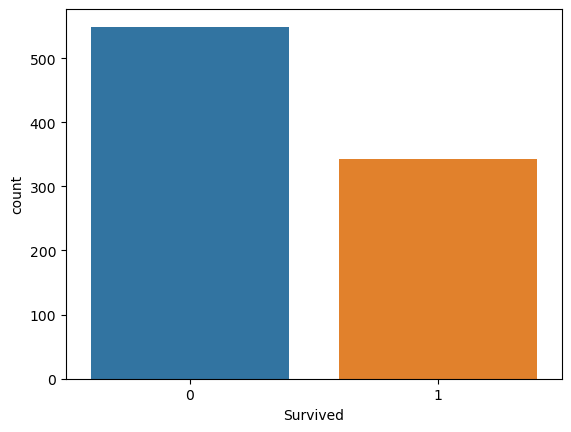

In [ ]:
# catagorical attributes
sns.countplot(x = 'Survived', data = train)

<AxesSubplot:xlabel='Pclass', ylabel='count'>

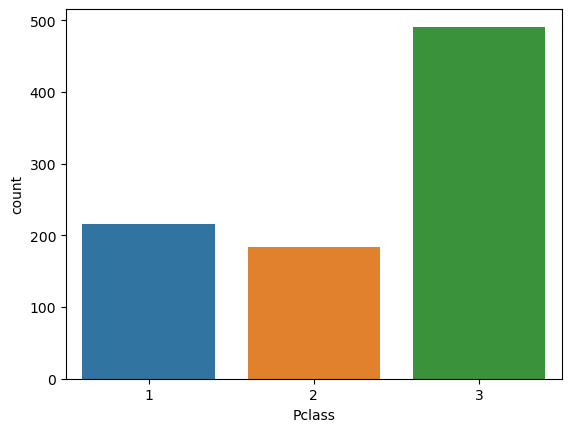

In [ ]:
sns.countplot(x = 'Pclass', data = train)

<AxesSubplot:xlabel='Sex', ylabel='count'>

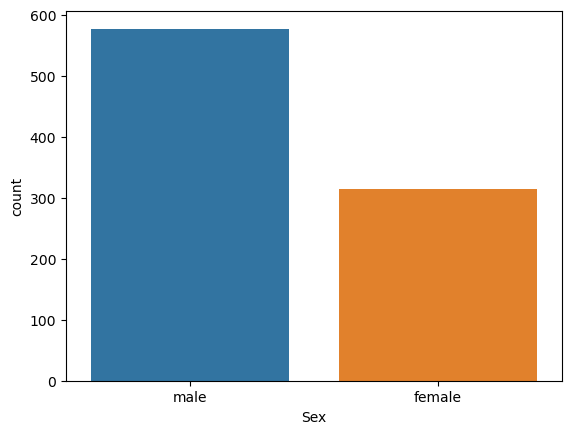

In [ ]:
sns.countplot(x = 'Sex', data = train)

<AxesSubplot:xlabel='SibSp', ylabel='count'>

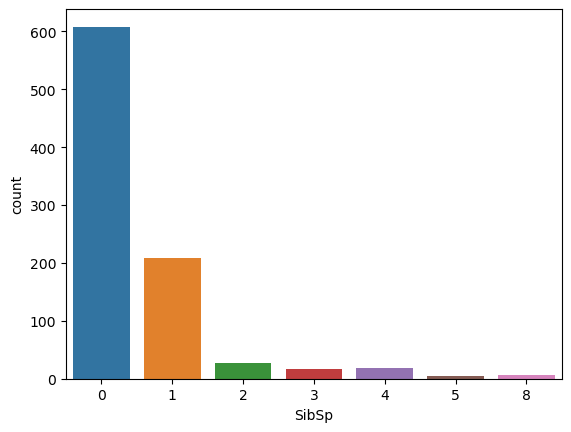

In [ ]:
sns.countplot(x = 'SibSp', data = train)

<AxesSubplot:xlabel='Parch', ylabel='count'>

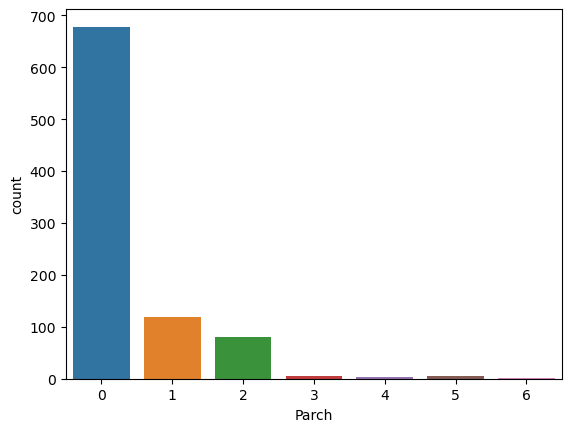

In [ ]:
sns.countplot(x = 'Parch', data = train)

<AxesSubplot:xlabel='Embarked', ylabel='count'>

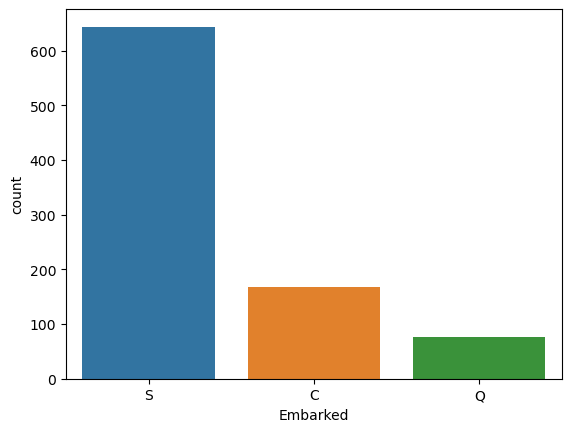

In [ ]:
sns.countplot(x = 'Embarked', data = train)

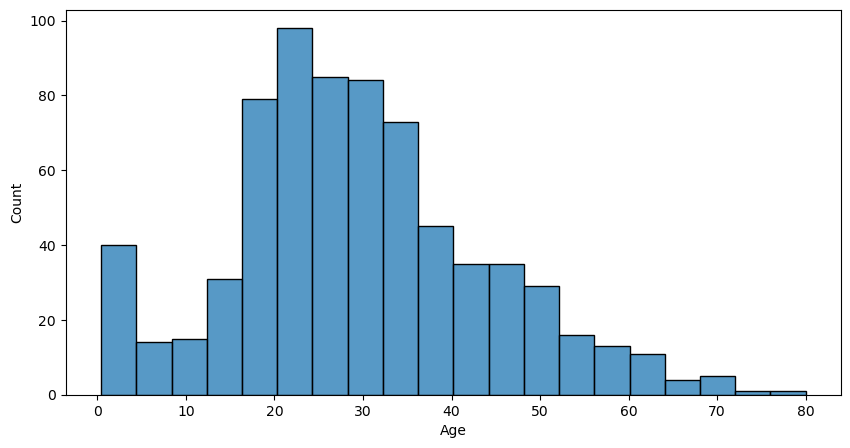

In [ ]:
plt.figure(figsize = (10,5))
sns.histplot(x = 'Age', data = train)
plt.show()

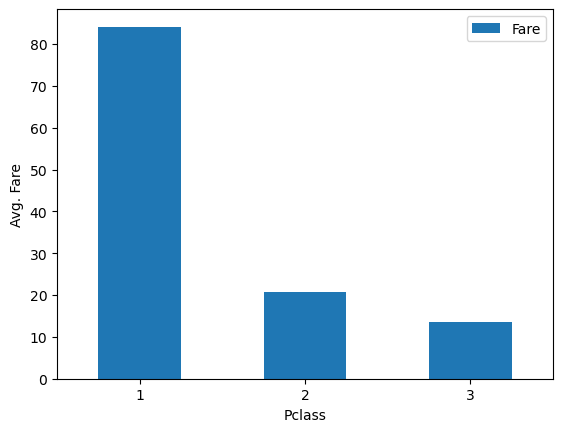

In [ ]:
class_fare = train.pivot_table(index = 'Pclass',values = 'Fare')
class_fare.plot(kind = 'bar')
plt.xlabel('Pclass')
plt.ylabel('Avg. Fare')
plt.xticks(rotation = 0)
plt.show()

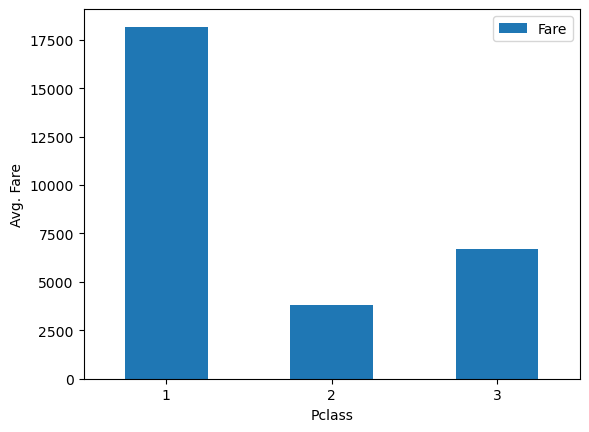

In [ ]:
class_fare = train.pivot_table(index = 'Pclass',values = 'Fare',aggfunc = np.sum)
class_fare.plot(kind = 'bar')
plt.xlabel('Pclass')
plt.ylabel('Avg. Fare')
plt.xticks(rotation = 0)
plt.show()

<AxesSubplot:xlabel='Pclass', ylabel='Fare'>

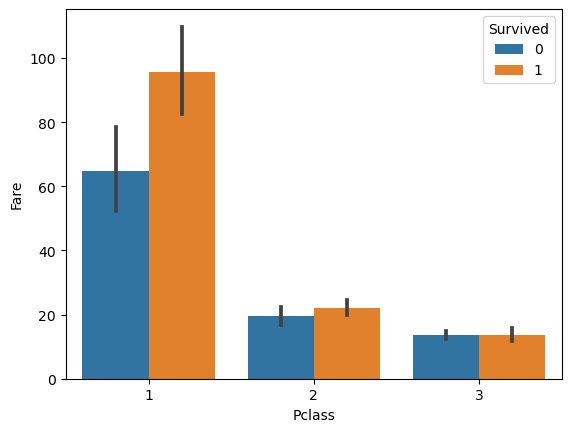

In [ ]:
sns.barplot(x = 'Pclass', y = 'Fare', hue = 'Survived', data = train)

<AxesSubplot:xlabel='Survived', ylabel='Fare'>

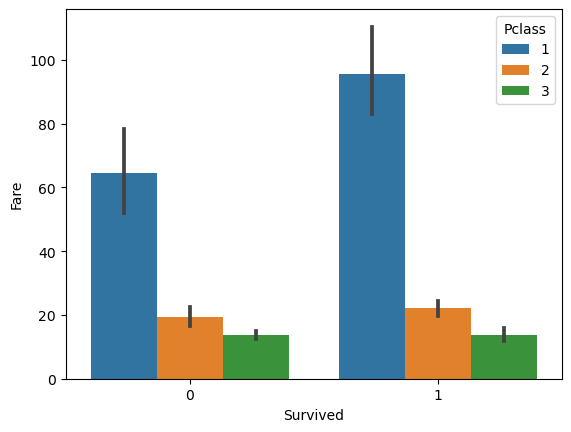

In [ ]:
sns.barplot(x = 'Survived', y = 'Fare', hue = 'Pclass', data = train)

# Data Preprocessiong

In [ ]:

#conbine two dataframe
df = pd.concat([train,test], axis = 0)
df = df.reset_index(drop = True)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1304,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1305,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1306,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
1307,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
1308,1309,NaN,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


In [ ]:
df.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

In [ ]:
df = df.drop('Cabin', axis = 1)

In [ ]:
# fill missing values using mean of the column

df['Age'] = df['Age'].fillna(df['Age'].mean())
df['Fare'] = df['Fare'].fillna(df['Fare'].mean())

In [ ]:
df['Embarked'].mode()[0]

'S'

In [ ]:
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

In [ ]:
df.dropna(inplace = True)

In [ ]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

## Log Transformation

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  


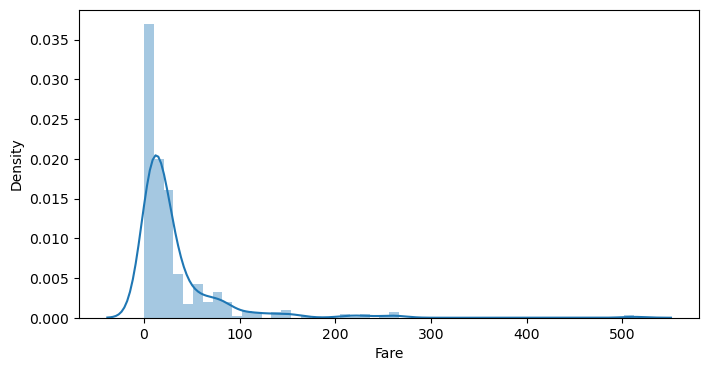

In [ ]:
plt.figure(figsize = (8,4))
sns.distplot(df['Fare'])
plt.show()

In [ ]:
df['Fare'] = np.log(df['Fare'] + 1)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  """Entry point for launching an IPython kernel.


<AxesSubplot:xlabel='Fare', ylabel='Density'>

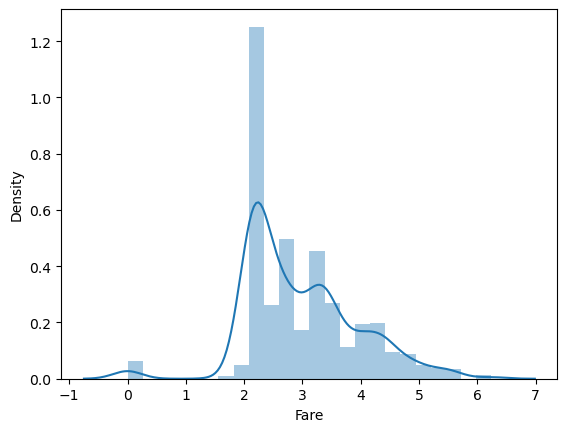

In [ ]:
sns.distplot(df['Fare'])

## Correlation Matrix

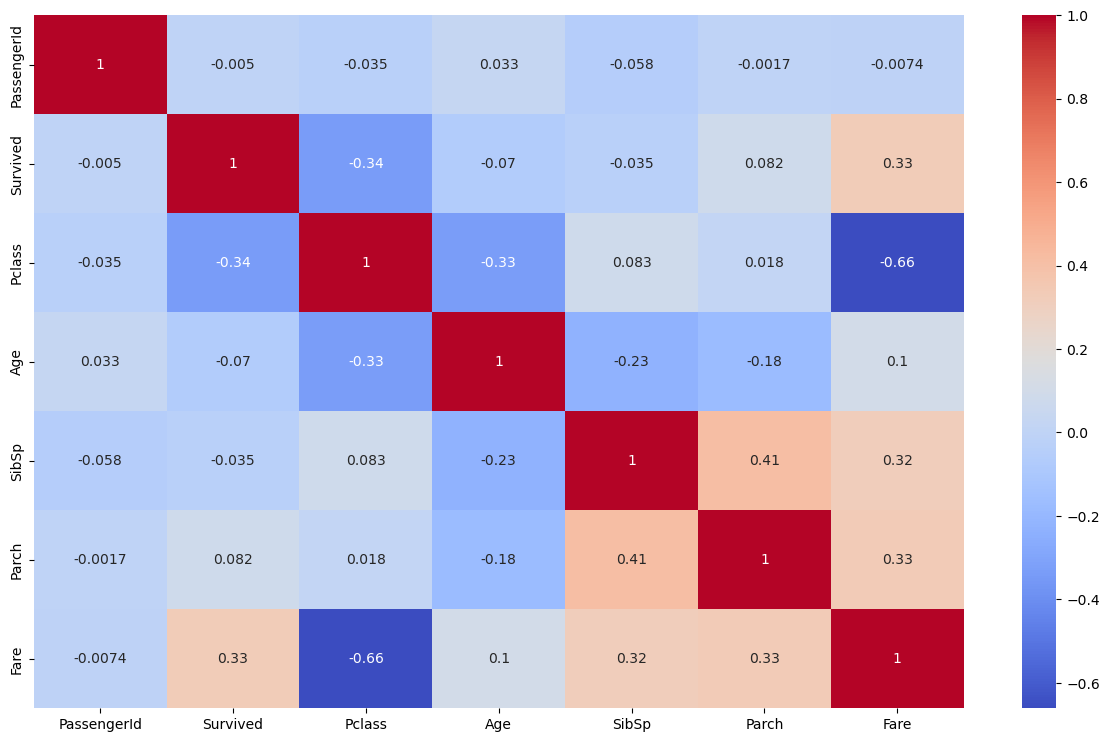

In [ ]:
plt.figure(figsize = (15,9))
sns.heatmap(df.corr(), annot = True, cmap = 'coolwarm')
plt.show()

In [ ]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,2.110213,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,4.280593,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,2.188856,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,3.990834,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,2.202765,S


In [ ]:
df = df.drop(['Name','Ticket'], axis = 1)

In [ ]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0.0,3,male,22.0,1,0,2.110213,S
1,2,1.0,1,female,38.0,1,0,4.280593,C
2,3,1.0,3,female,26.0,0,0,2.188856,S
3,4,1.0,1,female,35.0,1,0,3.990834,S
4,5,0.0,3,male,35.0,0,0,2.202765,S


## Label Encoding

In [ ]:
from sklearn.preprocessing import LabelEncoder
cols = ['Sex', 'Embarked']
le = LabelEncoder()

for col in cols:
    df[col] = le.fit_transform(df[col])
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0.0,3,1,22.0,1,0,2.110213,2
1,2,1.0,1,0,38.0,1,0,4.280593,0
2,3,1.0,3,0,26.0,0,0,2.188856,2
3,4,1.0,1,0,35.0,1,0,3.990834,2
4,5,0.0,3,1,35.0,0,0,2.202765,2


## Train - Test Split

In [ ]:
train = df.iloc[:668,:]

In [ ]:
test = df.iloc[668:,:]

In [ ]:
len(df)

891

In [ ]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0.0,3,1,22.0,1,0,2.110213,2
1,2,1.0,1,0,38.0,1,0,4.280593,0
2,3,1.0,3,0,26.0,0,0,2.188856,2
3,4,1.0,1,0,35.0,1,0,3.990834,2
4,5,0.0,3,1,35.0,0,0,2.202765,2


In [ ]:
test.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
668,669,0.0,3,1,43.000000,0,0,2.202765,2
669,670,1.0,1,0,29.881138,1,0,3.970292,2
670,671,1.0,2,0,40.000000,1,1,3.688879,2
671,672,0.0,1,1,31.000000,1,0,3.970292,2
672,673,0.0,2,1,70.000000,0,0,2.442347,2


In [ ]:
x = df.drop(['PassengerId','Survived'],axis = 1)
y = df['Survived']

In [ ]:
train_len = len(train)

In [ ]:
x.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,22.0,1,0,2.110213,2
1,1,0,38.0,1,0,4.280593,0
2,3,0,26.0,0,0,2.188856,2
3,1,0,35.0,1,0,3.990834,2
4,3,1,35.0,0,0,2.202765,2


In [ ]:
y.isnull().sum()

0

## Model Training

In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score

def classify(model):
    x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.25, random_state = 42)
    model.fit(x_train, y_train)
    print('Accuracy: ', model.score(x_test, y_test))
    
    score = cross_val_score(model,x,y, cv = 5)
    print('CV Score: ', np.mean(score))

In [ ]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
classify(model)

Accuracy:  0.7309417040358744
CV Score:  0.7688469022660221


In [ ]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
classify(model)

Accuracy:  0.8026905829596412
CV Score:  0.8081162513338773


In [ ]:
from xgboost import XGBClassifier
model = XGBClassifier()
classify(model)

Accuracy:  0.7892376681614349
CV Score:  0.8125980792166217


In [ ]:
from lightgbm import LGBMClassifier
model = LGBMClassifier()
classify(model)

Accuracy:  0.8116591928251121
CV Score:  0.8238277572029377


In [ ]:
from catboost import CatBoostClassifier
model = CatBoostClassifier(verbose = 0)
classify(model)

Accuracy:  0.8295964125560538
CV Score:  0.8226790534178645


## Complete model training with full data 

In [ ]:
model = LGBMClassifier()
model.fit(x,y)

LGBMClassifier()

In [ ]:
x_test = test.drop(['PassengerId','Survived'] ,axis = 1)

In [ ]:
x_test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
668,3,1,43.000000,0,0,2.202765,2
669,1,0,29.881138,1,0,3.970292,2
670,2,0,40.000000,1,1,3.688879,2
671,1,1,31.000000,1,0,3.970292,2
672,2,1,70.000000,0,0,2.442347,2


In [ ]:
x_test = test.drop(['PassengerId', 'Survived'], axis = 1)

In [ ]:
x_test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
668,3,1,43.000000,0,0,2.202765,2
669,1,0,29.881138,1,0,3.970292,2
670,2,0,40.000000,1,1,3.688879,2
671,1,1,31.000000,1,0,3.970292,2
672,2,1,70.000000,0,0,2.442347,2


In [ ]:
pred = model.predict(x_test)
pred

array([0., 1., 1., 0., 0., 1., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 1., 1., 1., 1., 0., 0., 0., 0., 1., 0., 0., 1., 1.,
       0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 1., 1., 0.,
       0., 1., 0., 0., 0., 1., 0., 1., 1., 0., 0., 1., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 1., 0., 1., 0., 1., 0., 0., 1., 0., 0., 1., 1., 0.,
       0., 1., 1., 0., 0., 0., 1., 0., 0., 1., 1., 0., 1., 0., 0., 0., 0.,
       0., 0., 1., 0., 1., 0., 0., 1., 0., 1., 1., 1., 1., 0., 0., 0., 1.,
       0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 1., 1., 1.,
       1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       1., 0., 1., 0., 0., 1., 1., 0., 1., 0., 1., 0., 0., 0., 1., 0., 0.,
       1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 1.,
       1., 1., 1., 1., 0., 0., 0., 1., 0., 0., 1., 1., 0., 0., 1., 0., 1.,
       0., 0., 1., 1., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 1., 0.,
       1., 0.])

## Test Submission

In [ ]:
sub = pd.read_csv('/kaggle/input/titanic/gender_submission.csv')

In [ ]:
sub.tail()

,PassengerId,Survived
413,1305,0
414,1306,1
415,1307,0
416,1308,0
417,1309,0


In [ ]:
sub['Survived'][:223] = pred
sub['Survived'] = sub['Survived'].astype('int')

In [ ]:
sub.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,1
3,895,0
4,896,0


In [ ]:
sub.to_csv("Submission.csv", index = False)